# Grafico Comparativo

## PROBLEM ZDT1

In [ ]:
#!pip install pymoo

In [2]:
from pymoo.algorithms.moo.rvea import RVEA
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.indicators.igd import IGD
from pymoo.indicators.hv import HV
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Parámetros generales
problem_id    = "zdt1"
pop_size      = 100
n_gen         = 100
seed_rvea     = 42    
seed_nsga2    = 123    

In [ ]:
# Configuración
problem = get_problem(problem_id)
pf_ref  = problem.pareto_front()
ref_dirs = get_reference_directions("das-dennis", problem.n_obj, n_partitions=12)

In [ ]:
# RVEA
algo_rvea = RVEA(ref_dirs=ref_dirs, pop_size=pop_size)
res_rvea  = minimize(problem, algo_rvea, ('n_gen', n_gen), seed=seed_rvea, verbose=False)
F_rvea    = res_rvea.F

In [ ]:
# NSGAII
algo_nsga2 = NSGA2(pop_size=pop_size)
res_nsga2  = minimize(problem, algo_nsga2, ('n_gen', n_gen), seed=seed_nsga2, verbose=False)
F_nsga2    = res_nsga2.F

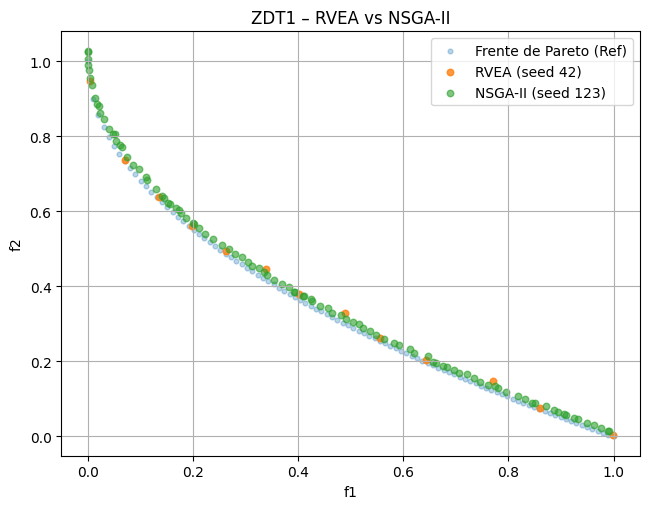

In [ ]:
# Gráfico comparativo
plt.figure(figsize=(6.6, 5.2))

if pf_ref is not None and len(pf_ref) > 0:
    plt.scatter(pf_ref[:, 0], pf_ref[:, 1], s=12, alpha=0.3, color='#1f77b4', label="Frente de Pareto (Ref)")

plt.scatter(F_rvea[:, 0], F_rvea[:, 1], s=22, alpha=0.8, color='#ff7f0e', label=f"RVEA (seed {seed_rvea})")
plt.scatter(F_nsga2[:, 0], F_nsga2[:, 1], s=22, alpha=0.6, color='#2ca02c', label=f"NSGA-II (seed {seed_nsga2})")

plt.title(f"{problem_id.upper()} – RVEA vs NSGA-II")
plt.xlabel("f1")
plt.ylabel("f2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## PROBLEM DTLZ2

In [ ]:
# Parámetros generales
problem_id = "dtlz2"
pop_size   = 100
n_gen      = 100

seed_rvea  = 123   # <-- tu seed para RVEA
seed_nsga2 = 123  # <-- tu seed para NSGA-II

In [ ]:
# Configuración
problem  = get_problem(problem_id)
ref_dirs = get_reference_directions("das-dennis", problem.n_obj, n_partitions=12)
pf_ref   = problem.pareto_front(ref_dirs)   # DTLZ2: usar ref_dirs

In [ ]:
# RVEA
algo_rvea = RVEA(ref_dirs=ref_dirs, pop_size=pop_size)
res_rvea  = minimize(problem, algo_rvea, ('n_gen', n_gen), seed=seed_rvea, verbose=False)
F_rvea    = res_rvea.F

In [ ]:
# NSGAII
algo_nsga2 = NSGA2(pop_size=pop_size)
res_nsga2  = minimize(problem, algo_nsga2, ('n_gen', n_gen), seed=seed_nsga2, verbose=False)
F_nsga2    = res_nsga2.F

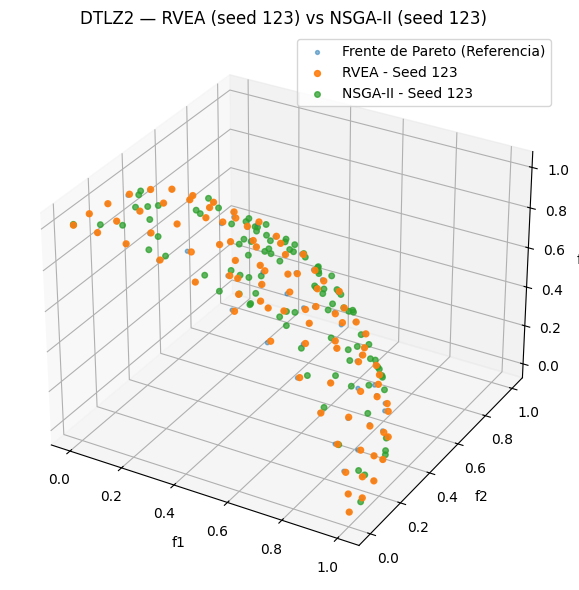

In [ ]:
# GRAFICO

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')

if pf_ref is not None:
    ax.scatter(pf_ref[:,0], pf_ref[:,1], pf_ref[:,2],
               s=8, alpha=0.5, color='#1f77b4', label="Frente de Pareto (Referencia)")

ax.scatter(F_rvea[:,0], F_rvea[:,1], F_rvea[:,2],
           s=18, alpha=0.9, color='#ff7f0e',
           label=f"RVEA - Seed {seed_rvea}")

ax.scatter(F_nsga2[:,0], F_nsga2[:,1], F_nsga2[:,2],
           s=16, alpha=0.75, color='#2ca02c',
           label=f"NSGA-II - Seed {seed_nsga2}")

# Estética del gráfico
ax.set_title(f"{problem_id.upper()} — RVEA (seed {seed_rvea}) vs NSGA-II (seed {seed_nsga2})")
ax.set_xlabel("f1")
ax.set_ylabel("f2")
ax.set_zlabel("f3")
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
# ráfico 3D
import plotly.graph_objects as go

fig = go.Figure()

# Pareto (Referencia)
fig.add_trace(go.Scatter3d(
    x=pf_ref[:,0], y=pf_ref[:,1], z=pf_ref[:,2],
    mode="markers",
    marker=dict(size=4.5, opacity=0.5, color="#1f77b4"),  
    name="Frente de Pareto (Ref)"
))

# RVEA
fig.add_trace(go.Scatter3d(
    x=F_rvea[:,0], y=F_rvea[:,1], z=F_rvea[:,2],
    mode="markers",
    marker=dict(size=6, opacity=0.95, color="#ff7f0e"),   
    name=f"RVEA (seed {seed_rvea})"
))

# NSGA-II
fig.add_trace(go.Scatter3d(
    x=F_nsga2[:,0], y=F_nsga2[:,1], z=F_nsga2[:,2],
    mode="markers",
    marker=dict(size=5, opacity=0.7, color="#2ca02c"),    
    name=f"NSGA-II (seed {seed_nsga2})"
))

fig.update_layout(
    title=f"{problem_id.upper()} — RVEA (seed {seed_rvea}) vs NSGA-II (seed {seed_nsga2})",
    scene=dict(xaxis_title="f1", yaxis_title="f2", zaxis_title="f3"),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.write_html("../html/frente_dtlz2_rvea_vs_nsga2.html", auto_open=True)